# Capstone #3: Telecom Churn Analysis

## Objectives

Customer retention is a critical part of maintaining business profitibility. Therefore, this analysis takes a deeper look at the customer churn at a California Telecom provider. 

The objective of this project is to determine the key drivers of customer churn.



## 1. Sourcing and Loading Data
Data sources:
            https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?select=telecom_zipcode_population.csv




In [1]:
#Preliminary imports for file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm

pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.options.display.max_colwidth = None


In [2]:
# Loading invididual CSV files being used
data_dictionary = pd.read_csv("../data/telecom_data_dictionary.csv", encoding = "ISO-8859-1")
customer_churn = pd.read_csv("../Data/telecom_customer_churn.csv") 
zipcodes = pd.read_csv("../Data/telecom_zipcode_population.csv")


### Previewing Data Dictionary DF
This is a reference table that does not need to be modified.

In [3]:
#Displaying the full data dictionary for future reference
data_dictionary

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the time the fiscal quarter ended (Q2 2022)"
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,"Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)"
5,Customer Churn,City,The city of the customers primary residence in California
6,Customer Churn,Zip Code,The zip code of the customers primary residence
7,Customer Churn,Latitude,The latitude of the customers primary residence
8,Customer Churn,Longitude,The longitude of the customers primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has referred a friend or family member to this company to date


### Previewing customer_churn table

In [4]:
#Determining dataframe dimensions & previewing a few entries
print(customer_churn.shape)
customer_churn.head()

(7043, 38)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
#Reviewing features of the dataset. Some noteable features are:
#Mean number of referrals is almost 2, mean tenure is 32 months and mean monthly charge is $63

customer_churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
#Review of dataframe for null values and data types
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### Previewing Zipcodes table

In [7]:
#Determining dataframe dimensions & previewing a few entries
print(zipcodes.shape)
zipcodes.head()

(1671, 2)


,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [8]:
#Review of dataframe for null values and data types
zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [9]:
#Confirming no null entiries exist in zipcodes dataframe
zipcodes.isnull().sum()

Zip Code      0
Population    0
dtype: int64

In [10]:
#Checking the minimum and maximum for each column: zipcode, zipcode population
zipcodes.min(), zipcodes.max()

(Zip Code      90001
 Population       11
 dtype: int64,
 Zip Code       96161
 Population    105285
 dtype: int64)

In [11]:
#Checking for duplicate entries
#There are some duplicate populations but no duplicated zipcodes
print(zipcodes.nunique())

Zip Code      1671
Population    1607
dtype: int64


In [12]:
#Further review of the duplicated zip code populations
#Duplicated values appear to be valid, not entry error.
zipcodes[zipcodes.duplicated(subset=['Population'], keep=False)].sort_values(by='Population')

,Zip Code,Population
60,90071,21
1168,95232,21
1547,95978,28
728,93435,28
806,93623,77
...,...,...
613,92887,20893
881,94002,25566
148,90746,25566
370,92120,25569


### Merging tables into one comprehensive dataframe

In [13]:
#Creating merged data frame to include zipcode data
zipcodes = zipcodes.rename(columns={"Population": "Zip Code Population"})
df = customer_churn.merge(zipcodes, on ="Zip Code", how= 'left')

#Dropping fields not used in analysis
df = df.drop(['Customer ID', 'Latitude', 'Longitude', 'City', 'Zip Code'], axis=1)
print(df.shape)
df.head()

(7043, 34)


,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


## 2. Cleaning Data

In [14]:
#Reviewing merged dataframe for missing information
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
Payment Method                    

In [15]:
#Subsetting to review rows with missing information
df[df.isna().any(axis=1)]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
5,Female,23,No,3,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN,433
6,Female,67,Yes,0,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN,6165
7,Male,52,Yes,0,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN,63947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,0,4,None,Yes,2.01,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,Competitor,Competitor made better offer,42239
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN,44652
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN,383
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN,12173


### Further exploration of missing data
Determined that missing data was the result of no service package for each customer.

In [16]:
#Identifying columns with N/A Churn Reason
df[(df['Customer Status'] == 'Stayed')| (df['Customer Status'] == 'Joined')]
#Result matches the 5174 missing values in "Churn Category" & "Churn Reason" columns

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
5,Female,23,No,3,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN,433
6,Female,67,Yes,0,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN,6165
7,Male,52,Yes,0,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN,63947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42.0,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,Stayed,NaN,NaN,68701
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN,44652
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN,383
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN,12173


In [17]:
#Identifying Columns with N/A Long Distance Charges & Multiple Lines
df[df['Phone Service'] == 'No']
#Result matches the 682 missing values in "Avg Monthly Long Distance Charges" & "Multiple Lines" columns  

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population
10,Male,47,No,0,0,54,None,No,NaN,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed,NaN,NaN,1072
14,Female,39,No,0,0,56,None,No,NaN,NaN,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed,NaN,NaN,1317
16,Female,52,Yes,1,0,34,None,No,NaN,NaN,Yes,DSL,20.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,61.25,1993.20,0.0,0,0.0,1993.20,Stayed,NaN,NaN,1885
19,Male,67,No,0,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.0,25.10,Churned,Competitor,Competitor made better offer,41707
25,Female,37,Yes,1,1,1,None,No,NaN,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,0.0,0,0.0,30.50,Churned,Attitude,Attitude of service provider,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Female,75,No,0,0,65,Offer B,No,NaN,NaN,Yes,Cable,9.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,53.50,3517.90,0.0,0,0.0,3517.90,Stayed,NaN,NaN,816
6980,Female,69,No,0,0,1,Offer E,No,NaN,NaN,Yes,DSL,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.05,25.05,0.0,0,0.0,25.05,Churned,Competitor,Competitor had better devices,73
6996,Female,58,No,0,0,12,Offer D,No,NaN,NaN,Yes,DSL,7.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,49.85,552.10,0.0,0,0.0,552.10,Stayed,NaN,NaN,1107
7016,Male,23,Yes,0,7,69,None,No,NaN,NaN,Yes,DSL,42.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,60.80,4263.40,0.0,0,0.0,4263.40,Stayed,NaN,NaN,16985


In [18]:
#Identifying Columns with N/A Long Distance Charges & Multiple Lines
df[df['Internet Service'] == 'No']
#Result matches the 1526 missing values in following columns:
#Internet Type
# Avg Monthly GB Download
# Online Security
# Online Backup
# Device Protection Plan
# Premium Tech Support
# Streaming TV
# Streaming Movies
# Streaming Music
# Unlimited Data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population
20,Female,79,Yes,0,0,50,None,Yes,31.43,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,25.20,1306.30,0.00,0,1571.50,2877.80,Stayed,NaN,NaN,1968
23,Female,22,No,0,0,3,None,Yes,3.12,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.85,57.20,0.00,0,9.36,66.56,Joined,NaN,NaN,71
24,Female,34,Yes,0,0,4,Offer E,Yes,12.43,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.35,76.35,0.00,0,49.72,126.07,Churned,Price,Long distance charges,155
27,Male,42,Yes,3,3,54,None,Yes,19.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,20.40,1090.60,0.00,0,1063.80,2154.40,Stayed,NaN,NaN,30668
28,Male,64,No,0,0,26,Offer C,Yes,37.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Bank Withdrawal,19.60,471.85,21.25,0,980.20,1430.80,Stayed,NaN,NaN,4101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Female,50,No,0,0,6,Offer E,Yes,31.02,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.70,129.55,0.00,0,186.12,315.67,Stayed,NaN,NaN,1005
7028,Female,56,Yes,1,2,67,Offer A,Yes,48.75,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Bank Withdrawal,19.25,1372.90,0.00,0,3266.25,4639.15,Stayed,NaN,NaN,301
7032,Male,62,Yes,3,0,46,None,Yes,7.67,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,19.75,856.50,0.00,0,352.82,1209.32,Stayed,NaN,NaN,58555
7033,Male,24,No,0,0,1,Offer E,Yes,49.51,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,18.90,18.90,0.00,0,49.51,68.41,Joined,NaN,NaN,227


### Imputation of missing data & encoding of existing data

In [19]:
#Creation of Current_Customer designation to capture Existing & Joined customers
df['Current_Customer'] = np.where(df['Customer Status'] != 'Churned', 1, 0)

#Using fillna to replace missing information
df =  df.fillna(value={'Churn Category':'Did Not Churn',
                       'Churn Reason':'Did Not Churn', 
                       'Avg Monthly Long Distance Charges':0,
                       'Internet Type':'None',
                       'Avg Monthly GB Download':0
                      })

In [20]:
#Creating categories using dictionary for better encoding of various columns
cleanup = {"Offer": {"None": 0, "Offer A": 1, "Offer B": 2, "Offer C": 3, "Offer D": 4, "Offer E": 5}, 
           "Internet Type": {'Cable':0, 'DSL':1,'Fiber Optic':2},
           "Payment Method": {'Bank Withdrawal':0, 'Credit Card':1, 'Mailed Check':2},
           "Contract":{'Month-to-Month':0, 'One Year':1, 'Two Year':2},
           "Customer Status": {'Churned':0, 'Stayed':1, 'Joined':2}
          }

In [21]:
#Applying cleanup dictionary created in prior cell
df = df.replace(cleanup)

In [22]:
#Creation of dummy variables where response is Boolean
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing'], drop_first=True)
df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Zip Code Population,Current_Customer,Gender_Male,Married_Yes,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Paperless Billing_Yes
0,37,0,2,9,0,42.39,0,16.0,1,1,65.6,593.30,0.00,0,381.51,974.81,1,Did Not Churn,Did Not Churn,4498,1,0,1,1,0,1,0,1,0,1,1,0,0,1,1
1,46,0,0,9,0,10.69,0,10.0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1,Did Not Churn,Did Not Churn,31297,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0
2,50,0,0,4,5,33.65,2,30.0,0,0,73.9,280.85,0.00,0,134.60,415.45,0,Competitor,Competitor had better devices,62069,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1
3,78,0,1,13,4,27.82,2,4.0,0,0,98.0,1237.85,0.00,0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction,46677,0,1,1,1,0,1,0,1,1,0,1,1,0,1,1
4,75,0,3,3,0,7.38,2,11.0,0,1,83.9,267.40,0.00,0,22.14,289.54,0,Dissatisfaction,Network reliability,42853,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1


In [23]:
#Review of dtypes after updating value formatting
df.dtypes

Age                                    int64
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Avg Monthly Long Distance Charges    float64
Internet Type                         object
Avg Monthly GB Download              float64
Contract                               int64
Payment Method                         int64
Monthly Charge                       float64
Total Charges                        float64
Total Refunds                        float64
Total Extra Data Charges               int64
Total Long Distance Charges          float64
Total Revenue                        float64
Customer Status                        int64
Churn Category                        object
Churn Reason                          object
Zip Code Population                    int64
Current_Customer                       int64
Gender_Male                            uint8
Married_Ye

In [24]:
#Optional loop to inspect categories of each column

# for column in df:
#    print(df[column].value_counts())

### Subsetting data to remove customers that joined during analysis period
Customers that joined this period have not had adequate chance to be retained or churn. As a result, it is not appropriate to include their data in this analysis.

In [25]:
existing_customer_df = df[df['Customer Status'] != 2]

## 3. Analysis of dataset

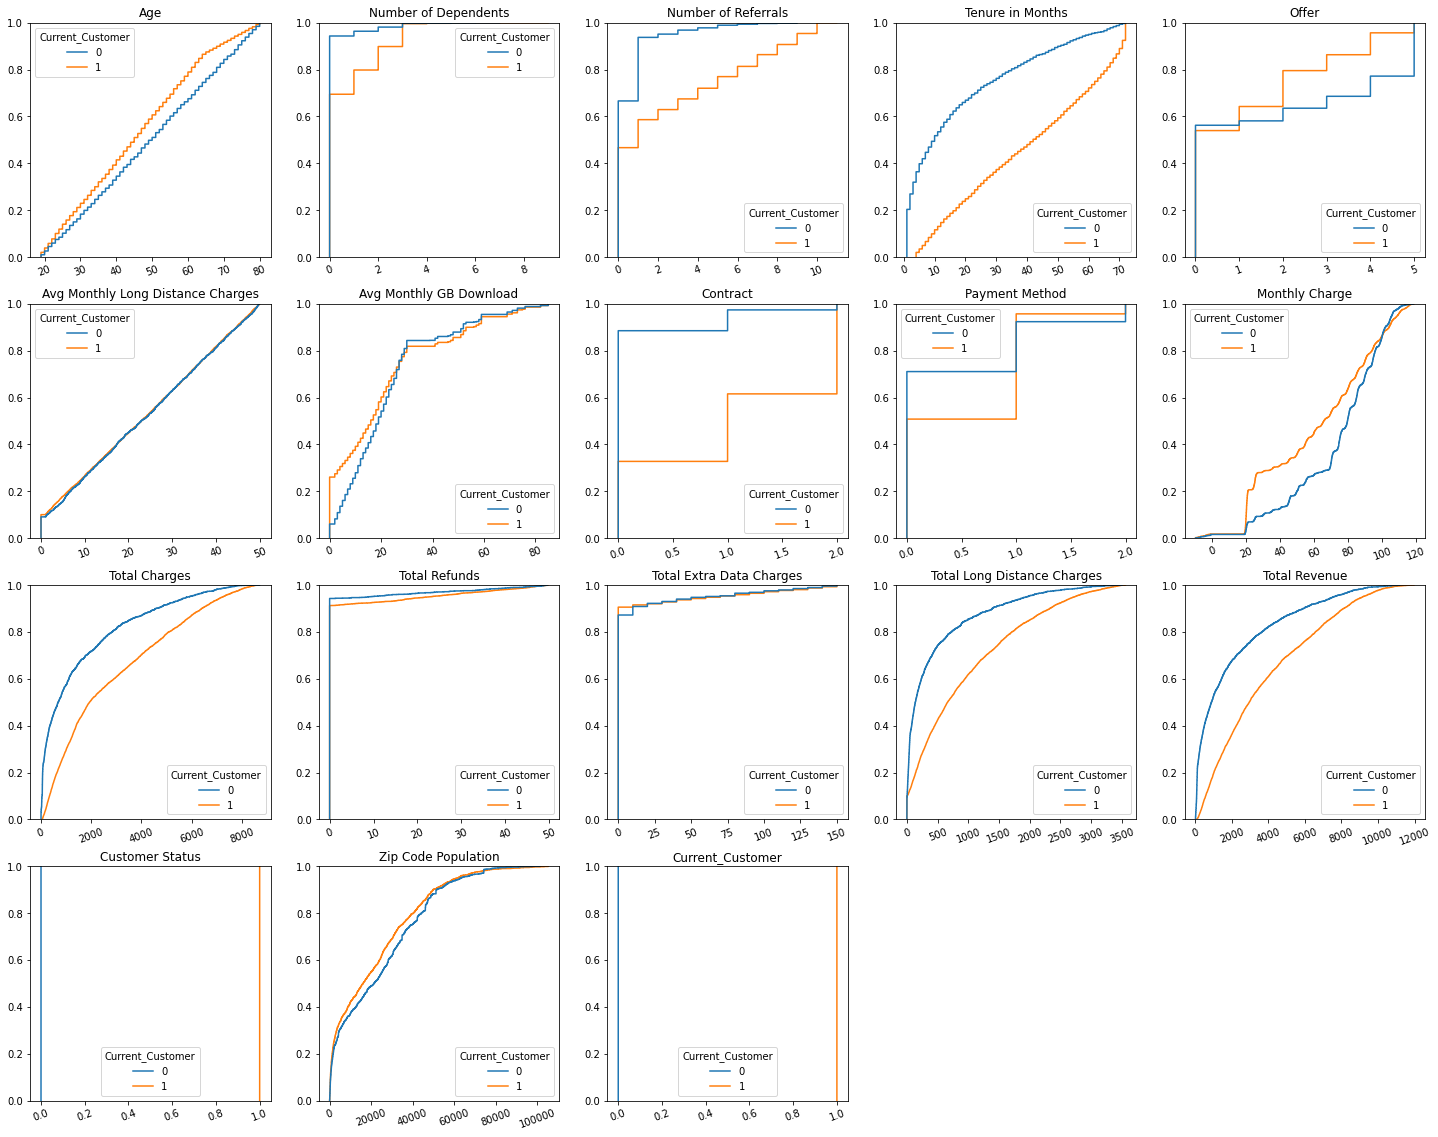

In [26]:
#Loop to plot the cumulative distribution of each numeric variable

num = [cname for cname in existing_customer_df.columns if existing_customer_df[cname].dtype in ['int64', 'float64']]
df_num = existing_customer_df[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.ecdfplot(x = existing_customer_df[n], hue = existing_customer_df['Current_Customer'], palette = 'tab10')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

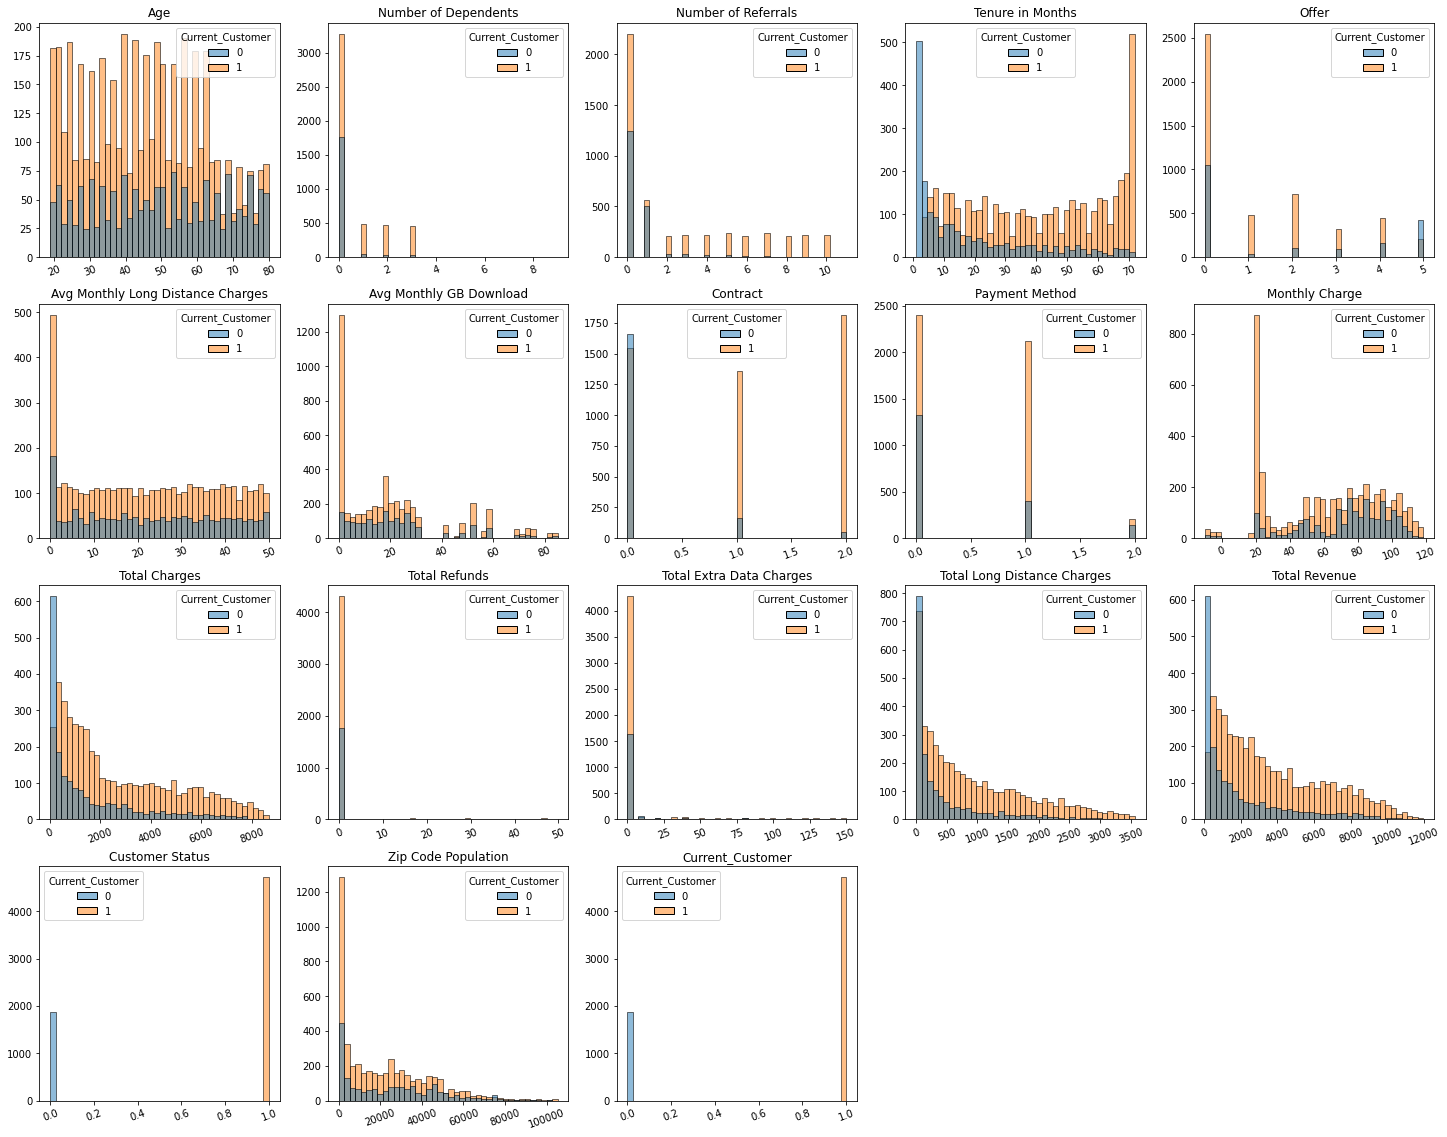

In [27]:
#Loop to plot the distribution of each numeric variable

num = [cname for cname in existing_customer_df.columns if existing_customer_df[cname].dtype in ['int64', 'float64']]
df_num = existing_customer_df[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = existing_customer_df[n], hue = existing_customer_df['Current_Customer'], palette = 'tab10', bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

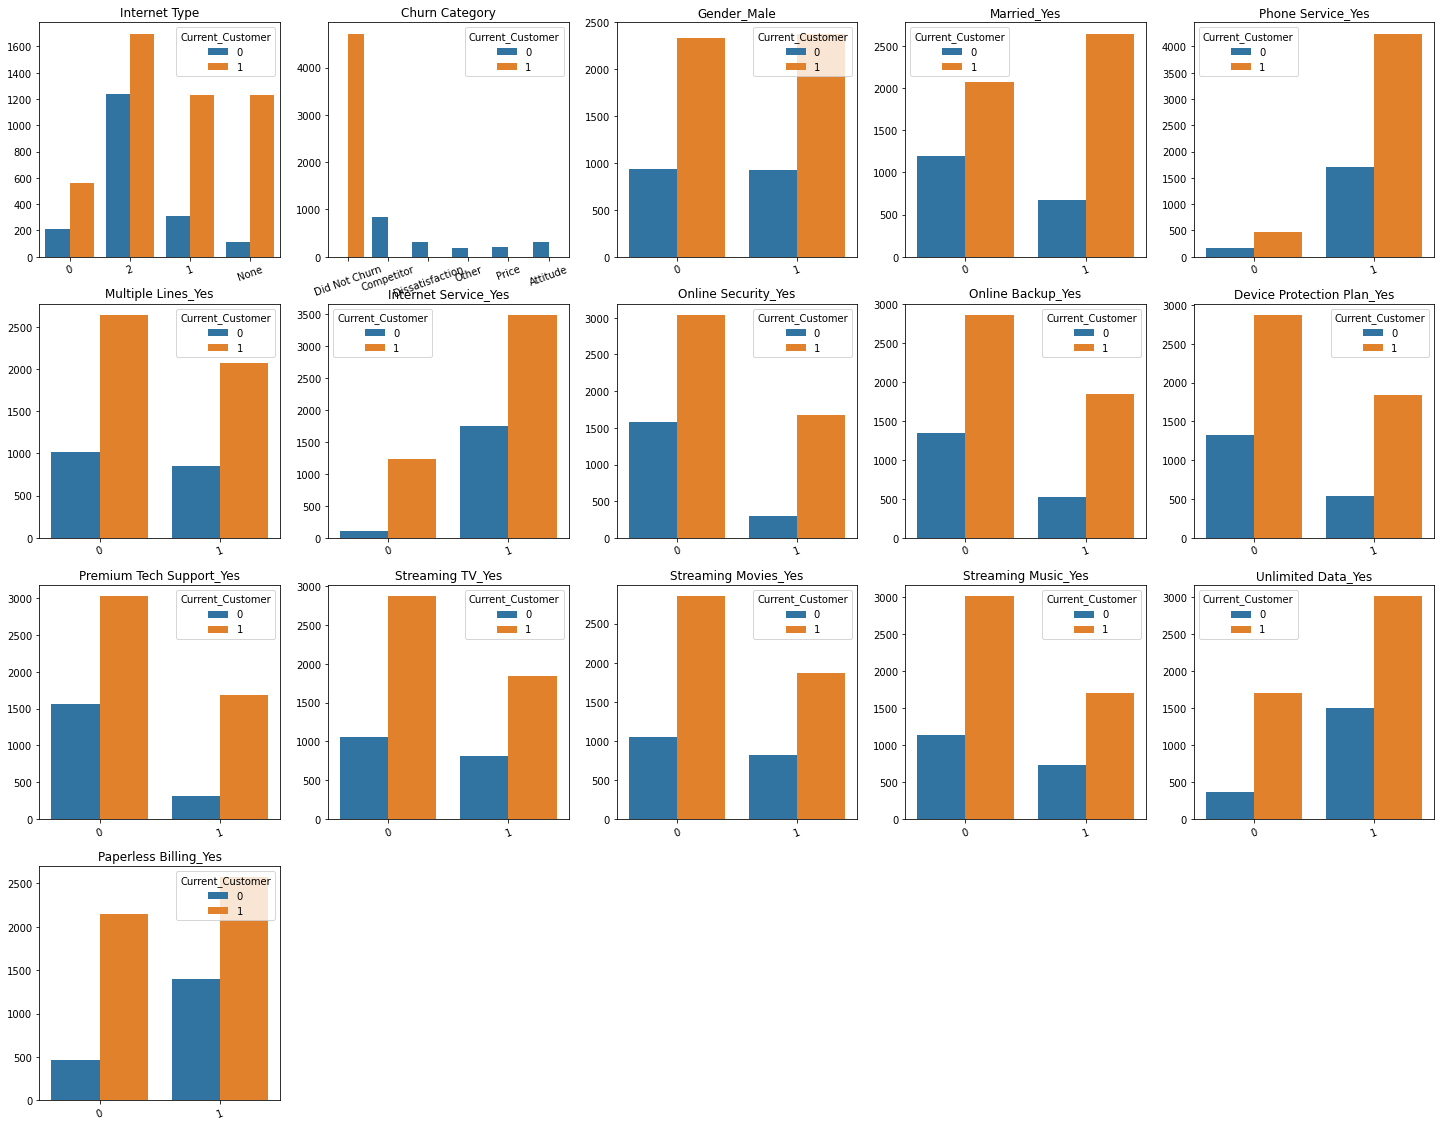

In [28]:
#Loop to plot the distribution of each categorical variable
cat = [cname for cname in existing_customer_df.columns if existing_customer_df[cname].nunique() < 10 and existing_customer_df[cname].dtype in ["object", 'uint8']]
dfc_cat = existing_customer_df[cat]

fig = plt.figure(figsize = (25, 25))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = dfc_cat, x = dfc_cat[c], hue = existing_customer_df['Current_Customer'], palette = 'tab10')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

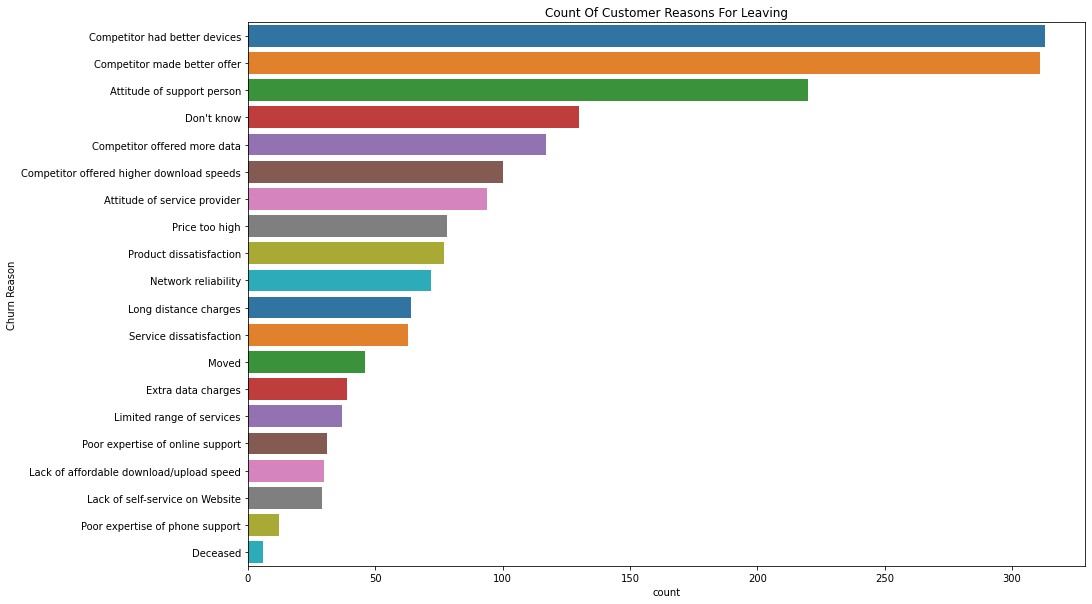

In [29]:
#Ranking of responses leading to customer churn

fig = plt.figure(figsize = (15, 10))
churn_df = df[df['Customer Status'] == 0]
ax = sns.countplot(data=churn_df, y='Churn Reason',order = churn_df['Churn Reason'].value_counts().index, palette='tab10')
plt.title('Count Of Customer Reasons For Leaving')
plt.show()

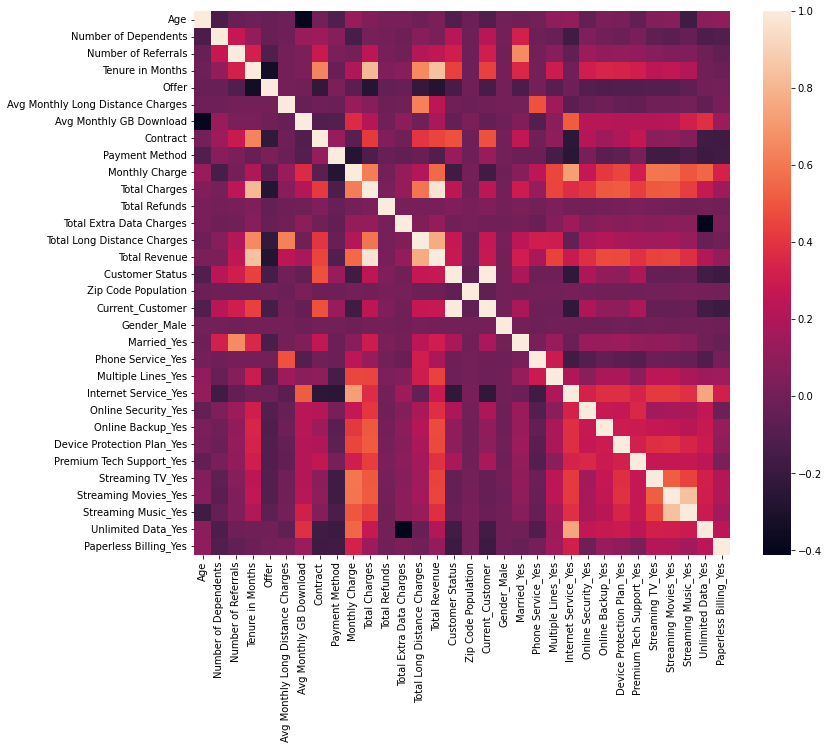

In [30]:
#Heatmap of the correlation between variables
#Our target row is "Customer Status"

plt.subplots(figsize=(12,10))
sns.heatmap(existing_customer_df.corr());

## 4. Modeling

In [31]:
#Importing PyCaret for modeling
from pycaret.classification import *

In [32]:
#Creating a copy of the original dataframe & subsetting to remove customers that joined this period.
df_ml = df.copy()
df_ml = df_ml[df_ml['Customer Status'] != 2]

In [33]:
#Review of columns in dataframe
df_ml.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Avg Monthly Long Distance Charges',
       'Internet Type', 'Avg Monthly GB Download', 'Contract',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Zip Code Population', 'Current_Customer', 'Gender_Male', 'Married_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes',
       'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes', 'Paperless Billing_Yes'],
      dtype='object')

In [34]:
#Dropping columns that leak data to the target variable
df_ml = df_ml.drop(columns=['Churn Category', 'Churn Reason', 'Current_Customer'])

In [35]:
#Breaking dataset into train/test split
data = df_ml.sample(frac=0.95, random_state=786)
data_unseen = df_ml.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6260, 32)
Unseen Data For Predictions: (329, 32)


### Setting up an environment

In [36]:
#Initializing PyCaret Environment
exp_clf101 = setup(data = data, target = 'Customer Status', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Customer Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6260, 32)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing All Models

In [37]:
#Comparing all models via PyCaret Pipeline
#Gradient Boositing Classifier is the best performing model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8774,0.9377,0.9464,0.8896,0.9171,0.6830,0.6885,0.2520
lightgbm,Light Gradient Boosting Machine,0.8742,0.9329,0.9356,0.8938,0.9141,0.6794,0.6823,0.0530
rf,Random Forest Classifier,0.8717,0.9252,0.9480,0.8819,0.9137,0.6652,0.6723,0.1220
ada,Ada Boost Classifier,0.8678,0.9265,0.9244,0.8946,0.9091,0.6668,0.6689,0.0800
et,Extra Trees Classifier,0.8637,0.9218,0.9298,0.8856,0.9071,0.6516,0.6547,0.1110
lda,Linear Discriminant Analysis,0.8439,0.9075,0.8900,0.8919,0.8908,0.6168,0.6176,0.0310
ridge,Ridge Classifier,0.8432,0.0000,0.9005,0.8830,0.8915,0.6085,0.6096,0.0220
dt,Decision Tree Classifier,0.8206,0.7800,0.8740,0.8752,0.8745,0.5597,0.5602,0.0230
knn,K Neighbors Classifier,0.7466,0.7117,0.8753,0.7927,0.8318,0.3229,0.3303,0.0320
nb,Naive Bayes,0.7188,0.8416,0.6735,0.9106,0.7738,0.4234,0.4584,0.0230


In [38]:
#Printing the best model & the hyperparameters used
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Creating a model

In [39]:
#Creatiion of a Gradient Boosting Classifier, our best performing model
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8861,0.9467,0.9395,0.9049,0.9219,0.7121,0.7138
1,0.8699,0.9241,0.9522,0.8768,0.9130,0.6568,0.6656
2,0.8904,0.9395,0.9554,0.8982,0.9259,0.7162,0.7212
3,0.8699,0.9305,0.9427,0.8836,0.9122,0.6621,0.6673
4,0.8676,0.9358,0.9554,0.8721,0.9119,0.6480,0.6590
5,0.8790,0.9419,0.9490,0.8896,0.9183,0.6858,0.6912
6,0.8767,0.9452,0.9297,0.9009,0.9151,0.6903,0.6914
7,0.8767,0.9281,0.9329,0.8985,0.9154,0.6888,0.6904
8,0.8767,0.9439,0.9489,0.8866,0.9167,0.6809,0.6867


In [40]:
#Tuning the hyperparemeters of the model using Random Grid Search
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8838,0.9396,0.9363,0.9046,0.9202,0.7070,0.7084
1,0.8653,0.9124,0.9427,0.8783,0.9094,0.6484,0.6546
2,0.8721,0.9264,0.9395,0.8886,0.9133,0.6706,0.6743
3,0.8744,0.9122,0.9268,0.9009,0.9137,0.6837,0.6846
4,0.8630,0.9266,0.9427,0.8757,0.9080,0.6415,0.6482
5,0.8790,0.9368,0.9427,0.8943,0.9178,0.6890,0.6924
6,0.8813,0.9400,0.9169,0.9169,0.9169,0.7089,0.7089
7,0.8699,0.9231,0.9201,0.9000,0.9100,0.6755,0.6760
8,0.8836,0.9345,0.9457,0.8970,0.9207,0.7024,0.7059


### Plotting a model

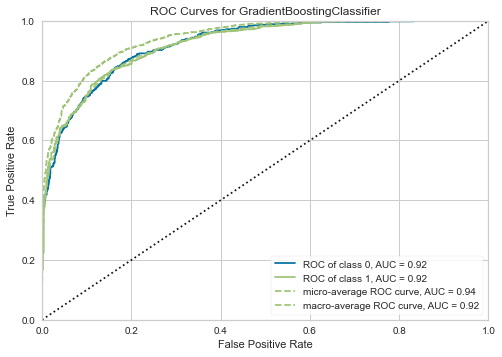

In [41]:
#Plotting the area under curve (AUC)
plot_model(tuned_gbc, plot = 'auc')

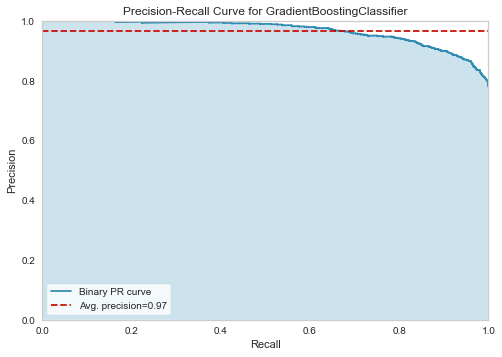

In [42]:
#Plotting the precision-recall curve
plot_model(tuned_gbc, plot = 'pr')

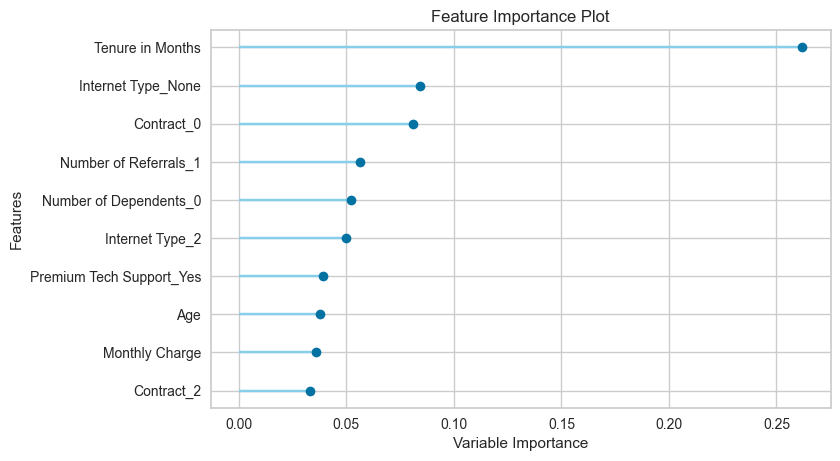

In [43]:
#Plotting the feature importance plot to rank most important features
plot_model(tuned_gbc, plot='feature')

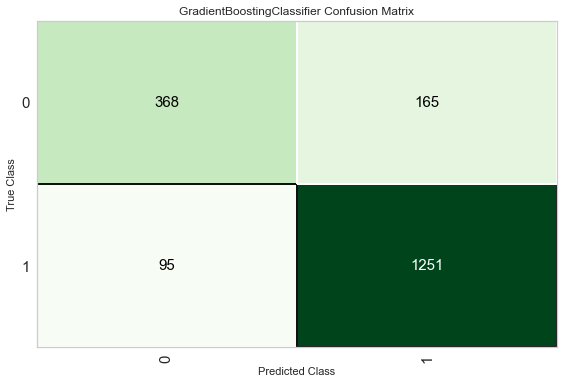

In [44]:
#Plotting a confusion matrix
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [45]:
#Analyizng performance using "evaluate model" which displays a user interface
#for all plots available in PyCaret

evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict on test / hold-out Sample

In [46]:
#Using predict_model uses our final model against the test hold-out sample made above
predict_model(tuned_gbc);
#AUC of 92.32% is slightly lower than 92.90% on our training set only
#This does not seem to indicate that the model is over-fitting.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8616,0.9232,0.9294,0.8835,0.9059,0.6455,0.6484


In [47]:
#Finalizing the model using 100% of the data available
final_gbc = finalize_model(tuned_gbc)

In [48]:
#Final GBC parameters for deployment
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [49]:
#When predicting using the full dataset, the model has an AUC of 95.73%
predict_model(final_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8973,0.9573,0.9465,0.9133,0.9296,0.7400,0.7417


## 5. Next Steps

Additional analysis could be done on the following topics:

Churn Retention: Knowing the features of customers that churn -- further work can be done to boost customer retention before they churn.

High Value Clients: Further analysis can be done to understand existing customers that have the highest monthly revenue figures. Additional research in this area could help the company boost customer satisfaction, increase revenue, or convert lower revenue customers into high revenue customers

New Customers: Understanding the profile of new customers would allow the telecom company to better position their offerings to attract customers to their programs. 


Each of these areas could improve the company financials but further analysis would need to be done to determine the magnitude of each.

Together, the three areas create a comprehensive customer lifecycle from customer acquisition -> customer (revenue) expansion -> customer retention.